<a href="https://colab.research.google.com/github/pvenkatt/DLL/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,BatchNormalization,Conv2D,MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from  skimage.transform import resize
from tensorflow.keras.utils import to_categorical
from keras.applications.inception_v3 import InceptionV3
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
import pickle
from keras import regularizers  

In [3]:
! unzip /content/drive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: ASL/Z/Z28.jpg           
  inflating: ASL/Z/Z280.jpg          
  inflating: ASL/Z/Z2800.jpg         
  inflating: ASL/Z/Z2801.jpg         
  inflating: ASL/Z/Z2802.jpg         
  inflating: ASL/Z/Z2803.jpg         
  inflating: ASL/Z/Z2804.jpg         
  inflating: ASL/Z/Z2805.jpg         
  inflating: ASL/Z/Z2806.jpg         
  inflating: ASL/Z/Z2807.jpg         
  inflating: ASL/Z/Z2808.jpg         
  inflating: ASL/Z/Z2809.jpg         
  inflating: ASL/Z/Z281.jpg          
  inflating: ASL/Z/Z2810.jpg         
  inflating: ASL/Z/Z2811.jpg         
  inflating: ASL/Z/Z2812.jpg         
  inflating: ASL/Z/Z2813.jpg         
  inflating: ASL/Z/Z2814.jpg         
  inflating: ASL/Z/Z2815.jpg         
  inflating: ASL/Z/Z2816.jpg         
  inflating: ASL/Z/Z2817.jpg         
  inflating: ASL/Z/Z2818.jpg         
  inflating: ASL/Z/Z2819.jpg         
  inflating: ASL/Z/Z282.jpg          
  inflating: ASL/Z/Z2820.jpg         

In [4]:
training_dir=r'/content/ASL'

In [5]:
content=sorted(os.listdir(training_dir))
print(content)
len(content)

['1', '3', '4', '5', '7', '8', '9', 'A', 'B', 'Baby', 'Brother', 'C', 'D', 'Dont_like', 'E', 'F', 'Friend', 'G', 'H', 'Help', 'House', 'I', 'J', 'K', 'L', 'Like', 'Love', 'M', 'Make', 'More', 'N', 'Name', 'No', 'O_OR_0', 'P', 'Pay', 'Play', 'Q', 'R', 'S', 'Stop', 'T', 'U', 'V_OR_2', 'W_OR_6', 'With', 'X', 'Y', 'Yes', 'Z', 'nothing']


51

In [6]:
data_generator = ImageDataGenerator(
    samplewise_center=True, 
    samplewise_std_normalization=True,
    brightness_range=[0.8, 1.0],
    zoom_range=[1.0, 1.2],
    validation_split=0.1
)

train_generator = data_generator.flow_from_directory(training_dir, target_size=(200,200),
                 shuffle=True, seed=13,
                class_mode='categorical', batch_size=64, subset="training")

validation_generator = data_generator.flow_from_directory(training_dir, target_size=(200, 200), 
                 shuffle=True, seed=13,
                 class_mode='categorical', batch_size=64, subset="validation")

Found 182700 images belonging to 51 classes.
Found 20300 images belonging to 51 classes.


In [7]:
def create_model():
    
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (200,200,3)))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(128, kernel_size = [5,5], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.5))
    
    model.add(Dense(1024, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(51, activation = 'softmax'))
    
    print("MODEL CREATED")
    return model

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu', input_shape = (64, 64, 1)))
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(29, activation='softmax'))

In [8]:

model = create_model()
model.summary()

MODEL CREATED
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 66, 66, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 66, 66, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7,

In [9]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])


In [11]:
model_hist = model.fit(train_generator,
                                validation_data=validation_generator,
                                steps_per_epoch=200,
                                validation_steps=50,
                                epochs=20,
                              )

Epoch 1/20
200/200 [==============================] - 188s 942ms/step - loss: 4.0909 - accuracy: 0.4575 - val_loss: 3.8763 - val_accuracy: 0.4453
Epoch 2/20
200/200 [==============================] - 179s 896ms/step - loss: 2.9793 - accuracy: 0.6435 - val_loss: 3.3478 - val_accuracy: 0.5069
Epoch 3/20
200/200 [==============================] - 179s 893ms/step - loss: 2.5731 - accuracy: 0.7205 - val_loss: 2.9998 - val_accuracy: 0.5834
Epoch 4/20
200/200 [==============================] - 176s 880ms/step - loss: 2.2971 - accuracy: 0.7721 - val_loss: 2.9196 - val_accuracy: 0.5934
Epoch 5/20
200/200 [==============================] - 173s 868ms/step - loss: 2.1150 - accuracy: 0.8046 - val_loss: 2.6255 - val_accuracy: 0.6619
Epoch 6/20
200/200 [==============================] - 175s 874ms/step - loss: 2.0507 - accuracy: 0.8178 - val_loss: 2.5025 - val_accuracy: 0.6828
Epoch 7/20
200/200 [==============================] - 173s 867ms/step - loss: 1.9585 - accuracy: 0.8323 - val_loss: 2.9978 -

In [12]:
model.save('cnns.h5')'''1h 50 secs'''

In [13]:
import shutil
shutil.copy('/content/cnns.h5','/content/drive/MyDrive/signdll')

'/content/drive/MyDrive/signdll/cnns.h5'

In [15]:
history=model_hist

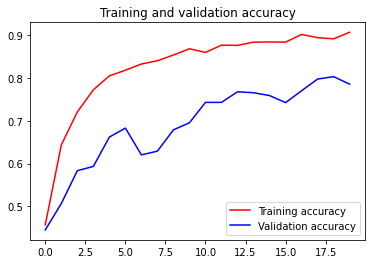

<Figure size 432x288 with 0 Axes>

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()



plt.show()

<Figure size 432x288 with 0 Axes>

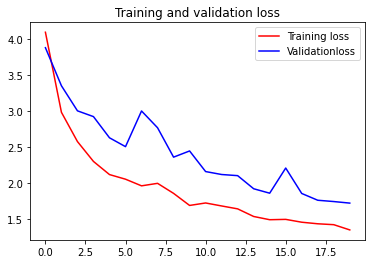

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validationloss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()